### Data Load

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
min_doc_freq = 2

In [5]:
train = pd.read_pickle('./train.pkl')

In [6]:
test = pd.read_pickle('./test.pkl')

In [7]:
vectorizer  = TfidfVectorizer(min_df=min_doc_freq)

In [8]:
x_train = vectorizer.fit_transform(train.Content)

In [9]:
x_test = vectorizer.transform(test.Content)

In [10]:
label_encoder = LabelEncoder()

In [11]:
train_int_lbl = label_encoder.fit_transform(train.Lable.values)

In [12]:
test_int_lbl = label_encoder.transform(test.Lable.values)

In [13]:
n_samples = np.bincount(train_int_lbl).sum()

In [14]:
n_classes = np.bincount(train_int_lbl).shape[0]

In [15]:
one_hot =  OneHotEncoder(sparse=False)

In [16]:
y_train = one_hot.fit_transform(train_int_lbl.reshape(-1, 1))

In [17]:
y_test = one_hot.transform(test_int_lbl.reshape(-1, 1))

### Feed Forward Network

I use sklearn style wrapper for feed forward neural network. This wrapper allows to modify hyper-parameters quickly. It uses keras + tensorflow

In [22]:
batch_size=256
hidden_layers=[100]
epochs=10
validation_split=0.1
dropout=0.7
balance_classes = True

In [23]:
if balance_classes:
    weights = n_samples / (n_classes * np.bincount(train_int_lbl))
    weights = {i:weights[i] for i in range(n_classes)}
else:
    weights = None

In [24]:
from neural_network import FeedForwardNetwork

In [25]:
model = FeedForwardNetwork(batch_size=batch_size, 
                           hidden_layers=hidden_layers ,
                           verbosity=2, 
                           epochs=epochs, 
                           validation_split=validation_split,
                           dropout=dropout, 
                           class_weight=weights)

In [26]:
model.fit(X=x_train, y=y_train)

Data size (50000, 213172) -	 Epochs 10 -	 Batch Size 256
Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 76s 2ms/step - loss: 1.8826 - acc: 0.7054 - val_loss: 1.2133 - val_acc: 0.7632
Epoch 2/10
45000/45000 [==============================] - 76s 2ms/step - loss: 0.9573 - acc: 0.7718 - val_loss: 0.8432 - val_acc: 0.7786
Epoch 3/10
45000/45000 [==============================] - 75s 2ms/step - loss: 0.6313 - acc: 0.8161 - val_loss: 0.7198 - val_acc: 0.7986
Epoch 4/10
45000/45000 [==============================] - 75s 2ms/step - loss: 0.4484 - acc: 0.8576 - val_loss: 0.6783 - val_acc: 0.8164
Epoch 5/10
45000/45000 [==============================] - 76s 2ms/step - loss: 0.3257 - acc: 0.8898 - val_loss: 0.6685 - val_acc: 0.8228
Epoch 6/10
45000/45000 [==============================] - 76s 2ms/step - loss: 0.2449 - acc: 0.9099 - val_loss: 0.6822 - val_acc: 0.8308
Epoch 7/10
45000/45000 [==============================] - 76s 2ms/step -

### Testing 

Test the model once finalized

In [27]:
model.model.evaluate(x=x_test, y=y_test)

12204/12204 [==============================] - 26s 2ms/step


[0.5201052383726364, 0.8456243854669304]

In [28]:
from utils import evaluate, plot_me_nice

In [29]:
accuracy, conf_mat, roc = evaluate(y_true=y_test, y_score=model.predict_proba(x_test))

In [30]:
accuracy

0.8456243854473943

In [31]:
roc

0.9691861280847264

In [32]:
print(conf_mat)

[[  34    0    0    7    0    0    1    0    0    0    0    1    0    1]
 [   5 3200   78   65  163    1   40    1   64   21    2  100    6    3]
 [   0   14   22    4    0    0    0    0    0    0    0    6    0    0]
 [  14   22   10 1600    7    2   56    0    3    0    1   99    1    5]
 [   4   86    1    8 1588    0    4   99    4   33   12   30   34    1]
 [   0    1    1    6    1  147    2    0    1    0    0   17    0    0]
 [   1   32    1   50   10    1   73    5    2    3    1   18    1    1]
 [   0    2    0    1   56    3    3  867    0    5    0    3    1    0]
 [   0   13    0    1    3    0    1    2  111    1    1    2    3    0]
 [   0    5    1    0    5    0    1    1    1   38    0    0    0    0]
 [   0    0    0    0    0    0    1    2    0    0  120    2    0    0]
 [   9   73   31  129   17   33   69    8    9    7    8 1627   11    5]
 [   0    8    0    4   32    0    2    0    4    6    1   12  766    0]
 [   1    4    0    2    0    0    0    0    0    0

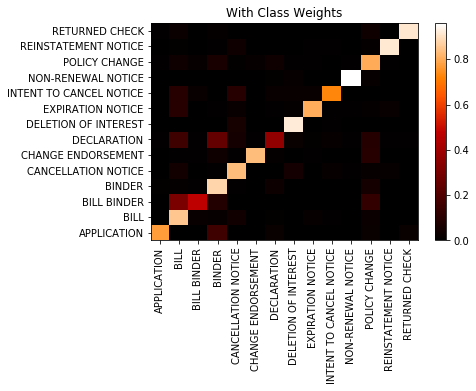

In [33]:
plot_me_nice(confusion_matrix=conf_mat, labels=list(label_encoder.classes_), title='With Class Weights')

### Testing (model without balancing)

This are the results for the old model without balancing. It has slightly higher accuracy, but is biased towards classes with more instances and hence replaced with new model.

In [22]:
model.model.evaluate(x=x_test, y=y_test)

12204/12204 [==============================] - 27s 2ms/step


[0.4588244205535494, 0.8594723042016419]

In [23]:
from utils import evaluate, plot_me_nice

In [24]:
accuracy, conf_mat, roc = evaluate(y_true=y_test, y_score=model.predict_proba(x_test))

In [29]:
accuracy

0.8594723041625697

In [30]:
roc

0.9674547237760539

In [25]:
print(conf_mat)

[[  27    7    0    7    0    0    0    0    0    0    0    2    0    1]
 [   0 3409    3   69  154    0    0    1    8    4    1   96    3    1]
 [   0   31    4    5    0    0    0    0    0    0    0    6    0    0]
 [   1   41    1 1634   10    0    3    0    0    0    0  129    0    1]
 [   1  118    0   10 1647    0    0   57    1    3    2   38   27    0]
 [   0    5    0    3    1  133    0    0    1    0    0   33    0    0]
 [   1   41    0   99   12    1   10    5    0    0    0   28    1    1]
 [   0    2    0    3   81    2    0  847    0    0    0    5    1    0]
 [   0   36    0    3   10    0    1    2   69    0    0    7   10    0]
 [   0   11    0    2   22    0    0    2    0   13    0    2    0    0]
 [   0    0    0    0   38    0    0    2    0    0   80    5    0    0]
 [   2  112    1  119   18   10    2    8    5    0    2 1749    8    0]
 [   0   12    0    3   42    0    0    3    1    0    0   19  755    0]
 [   0    9    0    7    1    0    0    0    0    0

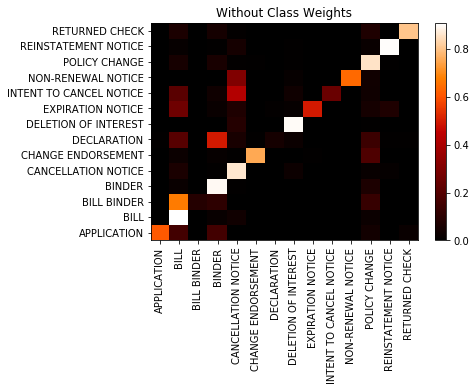

In [28]:
plot_me_nice(confusion_matrix=conf_mat, labels=list(label_encoder.classes_), title='Without Class Weights')

### Retrain and Pack Model

Retrain on all data and serialize for use in application

In [34]:
import pickle as pk 

In [35]:
data = pd.concat([train, test])

In [36]:
vectorizer  = TfidfVectorizer(min_df=min_doc_freq)

In [37]:
x = vectorizer.fit_transform(data.Content)

In [38]:
y = one_hot.transform(label_encoder.transform(data.Lable).reshape(-1, 1))

In [39]:
pk.dump(vectorizer, file=open('vectorizer.pkl', 'wb'))

In [40]:
# Same as previous model, but validation split and early stopping removed and epochs set to early stopped epochs
model = FeedForwardNetwork(batch_size=batch_size, hidden_layers=hidden_layers ,verbosity=2, epochs=epochs, dropout=dropout, class_weight=weights)

In [41]:
model.fit(X=x, y=y)

Data size (62204, 256883) -	 Epochs 10 -	 Batch Size 256
Epoch 1/10
62204/62204 [==============================] - 112s 2ms/step - loss: 1.6749 - acc: 0.7167
Epoch 2/10
62204/62204 [==============================] - 112s 2ms/step - loss: 0.7999 - acc: 0.7846
Epoch 3/10
62204/62204 [==============================] - 111s 2ms/step - loss: 0.5244 - acc: 0.8350
Epoch 4/10
62204/62204 [==============================] - 111s 2ms/step - loss: 0.3748 - acc: 0.8715
Epoch 5/10
62204/62204 [==============================] - 111s 2ms/step - loss: 0.2731 - acc: 0.8998
Epoch 6/10
62204/62204 [==============================] - 109s 2ms/step - loss: 0.2053 - acc: 0.9220
Epoch 7/10
62204/62204 [==============================] - 113s 2ms/step - loss: 0.1622 - acc: 0.9355
Epoch 8/10
62204/62204 [==============================] - 112s 2ms/step - loss: 0.1305 - acc: 0.9464
Epoch 9/10
62204/62204 [==============================] - 111s 2ms/step - loss: 0.1083 - acc: 0.9550
Epoch 10/10
62204/62204 [=========

In [42]:
model.model.save('ffn.h5')

### Test Case

In [18]:
words = test.Content[50001]

In [19]:
test.Lable[50001]

'CANCELLATION NOTICE'

In [20]:
labels = list(label_encoder.classes_)

In [21]:
labels

['APPLICATION',
 'BILL',
 'BILL BINDER',
 'BINDER',
 'CANCELLATION NOTICE',
 'CHANGE ENDORSEMENT',
 'DECLARATION',
 'DELETION OF INTEREST',
 'EXPIRATION NOTICE',
 'INTENT TO CANCEL NOTICE',
 'NON-RENEWAL NOTICE',
 'POLICY CHANGE',
 'REINSTATEMENT NOTICE',
 'RETURNED CHECK']

In [22]:
test.Content[50001]

'26f7353edc2e fdf32f896cc3 70f06d7a2533 eeb86a6a04e4 656b219766dc 572b3238a2c4 77ac9d61ee2e da2e1b058e4b 5b6bc2f0bdb1 9cdf4a63deb0 ee0c03371a49 b59e343416f7 6b304aabdcee 572b3238a2c4 8159faa9d80d 628863dfcdcd c64dd4330ce5 4e5019f629a9 6ce6cc5a3203 798fe9915030 f62c5f87f0af 0562c756a2f2 0562c756a2f2 1b6d0614f2c7 f0666bdbc8a5 5ee06767bc0f 586242498a88 1ab34730c1e0 6b343f522f78 2a6fbe672600 69056c5109b2 1c303d15eb65 f62c5f87f0af ed1e3242ee34 c9a53ea6e219 5ee06767bc0f c12d8d8d9530 7d41ca882f26 094453b4e4ae d38820625542 f62c5f87f0af 6ca2dd348663 6dcc75eaf823 f9b20c280980 1b6d0614f2c7 3486e5fe0d73 549330b9e320 f62c5f87f0af 586242498a88 1068682ce752 26f768da5068 6af770640118 bad6ff5dd7bc 67f9c02008c6 586242498a88 1068682ce752 1068682ce752 6ca2dd348663 b208ae1e8232 d38820625542 7d9e333a86da 04503bc22789 ce1f034abb5d 7420f0cec354 1015893e384a 5e99d31d8fa4 5c02c2aaa67b 93790ade6682 a65259ff0092 6c8642055a4e 4357c81e10c1 f0fd45d01d0a a31962fbd5f3 b61f1af56200 ffca4a0468c8 036087ac04f9 b136f6349cf

In [87]:
np.max(model.model.predict(vectorizer.transform([words])))

0.9925707

In [88]:
labels[np.argmax(model.model.predict(vectorizer.transform([words])))]

'CANCELLATION NOTICE'